# Desafios
1. Determinar o valor total da Folha Salarial.
2. Determinar o Faturamento da empresa.
3. Determine o Percentual de funcionários que já fechou algum contrato.
4. Determine o Total de contratos que cada área da empresa já fechou.
5. Determine o Total de funcionários por área.
6. Determine o Ticket médio mensal dos contratos.

## Importações e Tratamentos

In [2]:
import pandas as pd

# Puxando as bases de dados
clientes_df = pd.read_csv('bases/CadastroClientes.csv', sep=';', decimal=',')
funcionarios_df = pd.read_csv('bases/CadastroFuncionarios.csv', sep=';', decimal=',')
servicos_df = pd.read_excel('bases/ServiçosPrestados.xlsx')

# Retirando colunas desnecessárias
funcionarios_df = funcionarios_df.drop(['Estado Civil', 'Cargo'], axis='columns')

In [3]:
# Exibindo os DataFrames
display(clientes_df)
display(funcionarios_df)
display(servicos_df)

,ID Cliente,Cliente,Valor Contrato Mensal
0,1,Teixeira Gonçalves,540
1,2,Souza Santos,1260
2,3,Emídio Alves,3195
3,4,Santos Costa,2520
4,5,Do Monteiro,3510
...,...,...,...
315,316,Manoel Costa,3690
316,317,Gomes Machado,2385
317,318,Alkindar Cardozo,3510
318,319,Pereira Fazenda,4185


,ID Funcionário,Nome Completo,Salario Base,Impostos,Beneficios,VT,VR,Area
0,1,Gabriel Mesquita,21910,10955.0,4382.0,242,719.04,Operações
1,2,João Haddad,5404,2702.0,1080.8,154,574.56,Logística
2,3,Amanda Marques Ribeiro,16066,8033.0,3213.2,154,729.12,Administrativo
3,4,Guilherme Nunez,21305,10652.5,4261.0,220,524.16,Administrativo
4,5,Adelino Gomes,5098,2549.0,1019.6,176,725.76,Administrativo
...,...,...,...,...,...,...,...,...
109,143,Renan Scharnhorst Ott,10793,5396.5,2158.6,242,514.08,Logística
110,144,Lucas Brum Pereira,4048,2024.0,809.6,198,796.32,Comercial
111,148,Caio Stellet,24596,12298.0,4919.2,242,561.12,Administrativo
112,149,Fernanda Rocha,5078,2539.0,1015.6,308,665.28,Comercial


,Codigo do Servico,ID Funcionário,ID Cliente,Tempo Total de Contrato (Meses)
0,OS0001,67,1,14
1,OS0002,17,2,12
2,OS0003,116,4,14
3,OS0004,37,5,8
4,OS0005,130,6,8
...,...,...,...,...
232,OS0233,111,315,4
233,OS0234,124,316,8
234,OS0235,72,317,6
235,OS0236,90,319,14


### Desafio 1

In [40]:
# Folha salarial = Salário Base + Impostos + Benefícios + VT e VR
funcionarios_df['Salario Total'] = funcionarios_df['Salario Base'] + funcionarios_df['Impostos'] + funcionarios_df['Beneficios'] + funcionarios_df['VT'] + funcionarios_df['VR']
print(f'Folha salarial: \033[1;34mR$ {funcionarios_df["Salario Total"].sum():,}')

Folha salarial: R$ 2,717,493.22


### Desafio 2

In [34]:
faturamentos_df = clientes_df.merge(servicos_df, on='ID Cliente')[['ID Cliente', 'Tempo Total de Contrato (Meses)', 'Valor Contrato Mensal']]
faturamentos_df['Faturamento Total'] = faturamentos_df['Tempo Total de Contrato (Meses)'] * faturamentos_df['Valor Contrato Mensal']
print(f'Faturamento da empresa: \033[1;34mR$ {sum(faturamentos_df["Faturamento Total"]):,.2f}')

Faturamento da empresa: R$ 5,519,160.00


### Desafio 3

In [6]:
funcionarios_total = len(funcionarios_df['ID Funcionário'].unique())  # Quantidade TOTAL de funcionários
funcionarios_contrato = len(servicos_df['ID Funcionário'].unique())  # Quantidade de funcionários que fecharam 1 ou + contratos
print(f'Percentual de funcionários que fecharam contrato: \033[1;34m{funcionarios_contrato/funcionarios_total:.2%}')

Percentual de funcionários que fecharam contrato: 86.84%


### Desafio 4

In [7]:
areas_df = funcionarios_df[['Area', 'ID Funcionário']].merge(servicos_df[['Codigo do Servico', 'ID Funcionário']], on='ID Funcionário')
display(areas_df)
qtd_areas = areas_df['Area'].value_counts().to_frame()
display(qtd_areas)

,Area,ID Funcionário,Codigo do Servico
0,Operações,1,OS0101
1,Administrativo,3,OS0074
2,Administrativo,3,OS0167
3,Administrativo,4,OS0020
4,Administrativo,4,OS0042
...,...,...,...
232,Comercial,144,OS0145
233,Administrativo,148,OS0053
234,Administrativo,148,OS0091
235,Administrativo,148,OS0139


,Area
Administrativo,63
Operações,48
Comercial,44
Financeiro,42
Logística,40


Total de contratos por Área:
Administrativo: 63
Operações: 48
Comercial: 44
Financeiro: 42
Logística: 40


<AxesSubplot:>

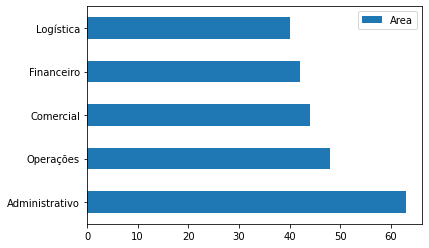

In [8]:
print('\033[;1mTotal de contratos por Área:\033[0m')
n = 0
for area in list(qtd_areas.index):
    print(f'\033[1;34m{area}: {qtd_areas.iloc[n, 0]}\033[0m')
    n += 1

qtd_areas.plot(kind='barh')

### Desafio 5

In [9]:
display(funcionarios_df)
qtd_funcionarios = funcionarios_df['Area'].value_counts().to_frame()
display(qtd_funcionarios)

,ID Funcionário,Nome Completo,Salario Base,Impostos,Beneficios,VT,VR,Area,Salario Total
0,1,Gabriel Mesquita,21910,10955.0,4382.0,242,719.04,Operações,38208.04
1,2,João Haddad,5404,2702.0,1080.8,154,574.56,Logística,9915.36
2,3,Amanda Marques Ribeiro,16066,8033.0,3213.2,154,729.12,Administrativo,28195.32
3,4,Guilherme Nunez,21305,10652.5,4261.0,220,524.16,Administrativo,36962.66
4,5,Adelino Gomes,5098,2549.0,1019.6,176,725.76,Administrativo,9568.36
...,...,...,...,...,...,...,...,...,...
109,143,Renan Scharnhorst Ott,10793,5396.5,2158.6,242,514.08,Logística,19104.18
110,144,Lucas Brum Pereira,4048,2024.0,809.6,198,796.32,Comercial,7875.92
111,148,Caio Stellet,24596,12298.0,4919.2,242,561.12,Administrativo,42616.32
112,149,Fernanda Rocha,5078,2539.0,1015.6,308,665.28,Comercial,9605.88


,Area
Administrativo,26
Comercial,26
Operações,23
Logística,21
Financeiro,18


Total de funcionários por área:
Administrativo: 26
Comercial: 26
Operações: 23
Logística: 21
Financeiro: 18

AxesSubplot(0.125,0.125;0.775x0.755)


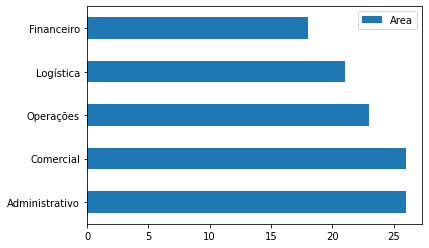

In [10]:
print('\033[;1mTotal de funcionários por área:\033[0m')
n = 0
for funcionario in list(qtd_funcionarios.index):
    print(f'\033[1;34m{funcionario}: {qtd_funcionarios.iloc[n, 0]}\033[0m')
    n += 1

print(f'\n{qtd_funcionarios.plot(kind="barh")}')

### Desafio 6

In [38]:
print(f'Ticket médio mensal: \033[1;34mR$ {clientes_df["Valor Contrato Mensal"].mean():,.2f}')

Ticket médio mensal: R$ 2,502.56
